In [1]:
import numpy as np
from io import StringIO
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats

data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
data2 = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    data2.append((round(hours,2),float(height)))
    

This just plots hours vs the height

Text(0, 0.5, 'Tide Height (ft)')

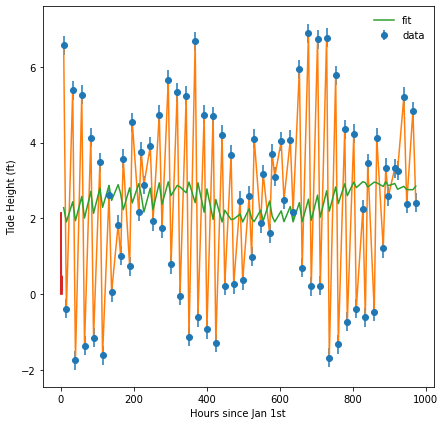

In [79]:
hours = []
height = []
for i in data2:
    hours.append(i[0])
    height.append(i[1])
hours = np.array(hours)
height = np.array(height)

def function(x, a, b, c, d, f, g, h):
    return (a * np.sin(b * x + c) + d) + (f * np.cos(g * x + h))

def function2(x, a, b, c, d):
    return (a * -1 * np.sin(((2 * np.pi)/(b)) * x + c) + d)

sig = 0.25
y_err = np.full(len(hours),sig)

#params, params_covariance = optimize.curve_fit(function2, hours, height,sigma=y_err, p0=[4., 2.5, -3.8, 1.6, -6.8, -0.3, 1.7])

params1, params_covariance2 = optimize.curve_fit(function2, hours, height,sigma=y_err,p0=[0.5,2*np.pi,0.1,3])

#a, b, c, d, f, g, h = params

a, b, c, d = params1



y_fit = function2(hours, a, b, c, d)


sig = 0.25
y_err = np.full(len(hours),sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(hours, height,yerr=y_err,fmt='o',label='data')
plt.plot(hours, height)
plt.plot(hours, y_fit, label='fit')
plt.plot(stats.linregress(hours, height))

plt.legend(loc=0,frameon=False)
plt.xlabel("Hours since Jan 1st")
plt.ylabel("Tide Height (ft)")

#plt.show()